# **In This experiment ,Main objective is to  extraction of join venture name from the scanned documents. For that used a layoutparser and ocr(optical character recognition) techniques.**


# EXTRACTION OF PARAGRAPHS FROM SCANNED IMAGES
---



In [ ]:
!pip install -U layoutparser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.2 MB 833 kB/s 
     |████████████████████████████████| 42 kB 714 kB/s 
     |████████████████████████████████| 40 kB 5.4 MB/s 
     |████████████████████████████████| 142 kB 64.3 MB/s 
     |████████████████████████████████| 3.1 MB 61.3 MB/s 
     |████████████████████████████████| 5.6 MB 17.7 MB/s 
     |████████████████████████████████| 4.0 MB 56.8 MB/s 
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31549 sha256=e47e1d37bb939137863dae6cae1c9669699503fc4a06a8a2b4c6726cc55ce6a2
  Stored in directory: /root/.cache/pip/wheels/aa/cc/ed/ca4e88beef656b01c84b9185196513ef2faf74a5a379b043a7
Successfully built iopath
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:

!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-oio6aubd/detectron2_53763cc809874c5682e3c8a10666b652
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-oio6aubd/detectron2_53763cc809874c5682e3c8a10666b652
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
     |████████████████████████████████| 47 kB 4.6 MB/s 
     |████████████████████████████████| 79 kB 9.0 MB/s 
     |████████████████████████████████| 117 kB 79.2 MB/s 
  Created wheel for detectron2: filename=detectron2-0.4-cp37-cp37m-linux_x86_64.whl size=4770382 sha256=d74f849cf887384ac5ed9c55da30fa79d8c4d197a104b600cdaabe7237e2c3b1
  Stored in directory: /tmp/pip-ephem-wheel-cache-rqgz9ghv/wheels/87/3f/26/dc45098d34763c9dc05ea3ab35c6dec6e9e8c16ac741efb741
  Created wheel for fvcore: filename=fvcore-0.1.3.post20

In [ ]:
!pip install layoutparser[ocr]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 25.1 MB/s 


In [ ]:
!git clone https://github.com/Layout-Parser/layout-parser.git

Cloning into 'layout-parser'...
remote: Enumerating objects: 1351, done.
remote: Counting objects: 100% (376/376), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 1351 (delta 323), reused 260 (delta 257), pack-reused 975
Receiving objects: 100% (1351/1351), 62.85 MiB | 21.25 MiB/s, done.
Resolving deltas: 100% (736/736), done.


In [ ]:
%cd layout-parser/

/content/layout-parser


In [ ]:
import cv2
image = cv2.imread("/content/joint ventutre.png")
image = image[..., ::-1]

/usr/local/lib/python3.7/dist-packages/detectron2/structures/image_list.py:101: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


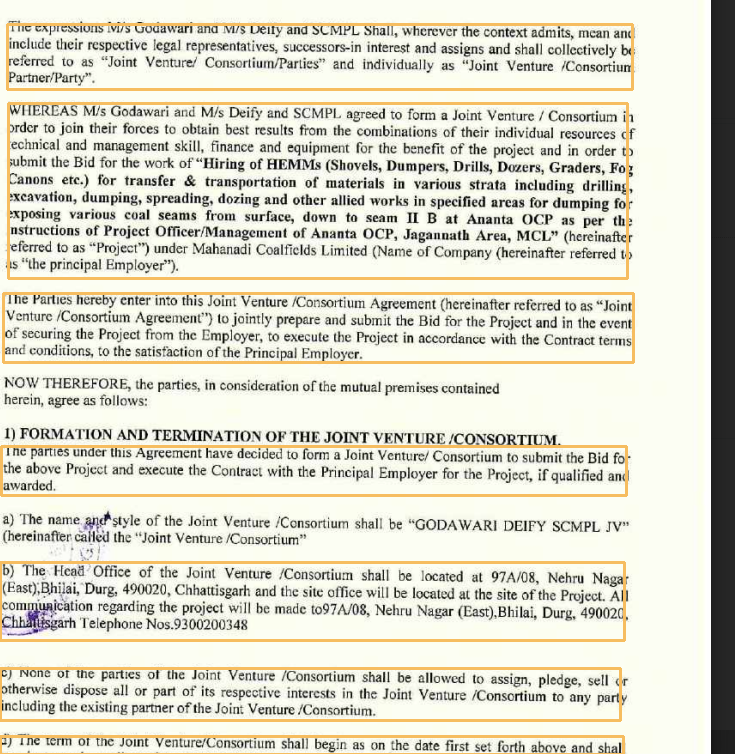

In [ ]:
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://PubLayNet/mask_rcnn_X_101_32x8d_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [ ]:
text_blocks = lp.Layout([b for b in layout if b.type=="Text"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=8.461146354675293, y_1=103.32740020751953, x_2=627.954833984375, y_2=278.8541564941406), text=None, id=None, type=Text, parent=None, next=None, score=0.9919195175170898), TextBlock(block=Rectangle(x_1=3.068986177444458, y_1=293.50360107421875, x_2=633.9202270507812, y_2=362.12078857421875), text=None, id=None, type=Text, parent=None, next=None, score=0.9862252473831177), TextBlock(block=Rectangle(x_1=7.663717269897461, y_1=24.84000015258789, x_2=632.1455078125, y_2=89.00951385498047), text=None, id=None, type=Text, parent=None, next=None, score=0.9594049453735352), TextBlock(block=Rectangle(x_1=1.7958354949951172, y_1=446.2220153808594, x_2=626.8052978515625, y_2=495.7757263183594), text=None, id=None, type=Text, parent=None, next=None, score=0.9374053478240967), TextBlock(block=Rectangle(x_1=0.0, y_1=736.654052734375, x_2=623.0572509765625, y_2=754.0), text=None, id=None, type=Text, parent=None, next=None, score=0.8520647287368774), TextBl

In [ ]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [ ]:
figure_blocks

Layout(_blocks=[], page_data={})

In [ ]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [ ]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

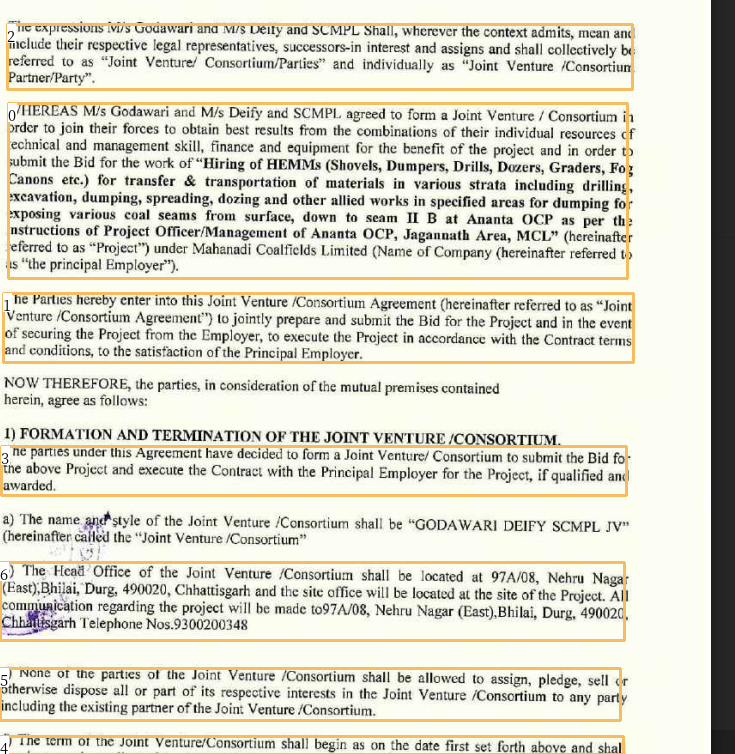

In [ ]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [ ]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [ ]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

WHEREAS M/s Godawari and M/s Deify and SCMPL agreed to form a Joint Venture / Consortium i
order to join their forces to obtain best results from the combinations of their individual resources o'
technical and management skill, finance and equipment for the benefit of the project and in order tc
submit the Bid for the work of “Hiring of HEMMs (Shovels, Dumpers, Drills, Dozers, Graders, Fog
Canons ete.) for transfer & transportation of materials in various strata including drilling,
excavation, dumping, spreading, dozing and other allied works in specified areas for dumping for
exposing various coal seams from surface, down to seam II B at Ananta OCP as per the
instructions of Project Officer/Management of Ananta OCP, Jagannath Area, MCL” (hereinafter
referred to as “Project”) under Mahanadi Coalfields Limited (Name of Company (hereinafter referred tc
as “the principal Employer"),

---
  

‘The Parties hereby enter into this Joint Venture ‘Consortium Agreement (hereinafter referred to 

In [ ]:
text_blocks.get_texts()

['WHEREAS M/s Godawari and M/s Deify and SCMPL agreed to form a Joint Venture / Consortium i\norder to join their forces to obtain best results from the combinations of their individual resources o\'\ntechnical and management skill, finance and equipment for the benefit of the project and in order tc\nsubmit the Bid for the work of “Hiring of HEMMs (Shovels, Dumpers, Drills, Dozers, Graders, Fog\nCanons ete.) for transfer & transportation of materials in various strata including drilling,\nexcavation, dumping, spreading, dozing and other allied works in specified areas for dumping for\nexposing various coal seams from surface, down to seam II B at Ananta OCP as per the\ninstructions of Project Officer/Management of Ananta OCP, Jagannath Area, MCL” (hereinafter\nreferred to as “Project”) under Mahanadi Coalfields Limited (Name of Company (hereinafter referred tc\nas “the principal Employer"),\n\x0c',
 '  \n\n‘The Parties hereby enter into this Joint Venture ‘Consortium Agreement (herein

In [ ]:
for block in text_blocks:
  print(block)

TextBlock(block=Rectangle(x_1=8.461146354675293, y_1=103.32740020751953, x_2=627.954833984375, y_2=278.8541564941406), text=WHEREAS M/s Godawari and M/s Deify and SCMPL agreed to form a Joint Venture / Consortium i
order to join their forces to obtain best results from the combinations of their individual resources o'
technical and management skill, finance and equipment for the benefit of the project and in order tc
submit the Bid for the work of “Hiring of HEMMs (Shovels, Dumpers, Drills, Dozers, Graders, Fog
Canons ete.) for transfer & transportation of materials in various strata including drilling,
excavation, dumping, spreading, dozing and other allied works in specified areas for dumping for
exposing various coal seams from surface, down to seam II B at Ananta OCP as per the
instructions of Project Officer/Management of Ananta OCP, Jagannath Area, MCL” (hereinafter
referred to as “Project”) under Mahanadi Coalfields Limited (Name of Company (hereinafter referred tc
as “the princ

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install spacy-transformers
!python -m spacy download en_core_web_trf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-09-29 23:50:57.596239: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 460.3 MB 41 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [ ]:
!pip install click==7.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
nlp = spacy.load("en_core_web_trf")

In [ ]:
sentence=["".join(txt) for txt in text_blocks.get_texts()]

In [ ]:
".".join(sentence)

'WHEREAS M/s Godawari and M/s Deify and SCMPL agreed to form a Joint Venture / Consortium i\norder to join their forces to obtain best results from the combinations of their individual resources o\'\ntechnical and management skill, finance and equipment for the benefit of the project and in order tc\nsubmit the Bid for the work of “Hiring of HEMMs (Shovels, Dumpers, Drills, Dozers, Graders, Fog\nCanons ete.) for transfer & transportation of materials in various strata including drilling,\nexcavation, dumping, spreading, dozing and other allied works in specified areas for dumping for\nexposing various coal seams from surface, down to seam II B at Ananta OCP as per the\ninstructions of Project Officer/Management of Ananta OCP, Jagannath Area, MCL” (hereinafter\nreferred to as “Project”) under Mahanadi Coalfields Limited (Name of Company (hereinafter referred tc\nas “the principal Employer"),\n\x0c.  \n\n‘The Parties hereby enter into this Joint Venture ‘Consortium Agreement (hereinafter

# Extracted Joint Venture Name


In [ ]:
doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


M/s Godawari ORG
M/s Deify ORG
SCMPL ORG
Ananta OCP FAC
the Joint Venture /Consortium ORG
the Joint Venture /Consortium ORG
the Join: Venture Consortium ORG
East),Bhilai GPE
Durg GPE
490020 CARDINAL
Chhattisgarh GPE
East),Bhilai GPE
Durg GPE
490020 DATE
